In [224]:

import pandas as pd
import sklearn
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Activation,Dropout

# Pre-Modeling Tasks
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

# Modeling
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
sns.set(style='whitegrid'); sns.set_context('talk')
# Let's start by naming the features
names = ['Id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data = pd.read_csv(url, names=names) 


from sklearn.datasets import load_breast_cancer
#cancer_data = load_breast_cancer()
data.drop('Id', axis=1, inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


In [226]:
print('2.	Drop the missing or non-numeric values') 
cancer_data = data.replace('?',np.NaN)
print('Number of instances = %d' % (cancer_data.shape[0]))
print('Number of attributes = %d' % (cancer_data.shape[1]))
for col in cancer_data.columns:
    print('\t%s: %d' % (col,cancer_data[col].isna().sum()))
data2 = cancer_data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])
print('Number of rows in original data = %d' % (cancer_data.shape[0]))

cancer_data = cancer_data.dropna()
print('Number of rows after discarding missing values = %d' % (cancer_data.shape[0]))

2.	Drop the missing or non-numeric values
Number of instances = 699
Number of attributes = 10
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0
Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object
Number of rows in original data = 699
Number of rows after discarding missing values = 683


In [227]:
# Takes first 4 columns and assign them to variable "X"
X = cancer_data.iloc[:, 0:9]

# Takes first 10th columns and assign them to variable "Y". Object dtype refers to strings.
y = cancer_data.iloc[:, 9:10]

le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

In [228]:
random.seed(123)
train_X, test_X , train_y, test_y  = train_test_split(X, y, test_size = 0.20) 
scaler = StandardScaler()  
scaler.fit(train_X)
train_X = scaler.transform(train_X)  
test_X = scaler.transform(test_X) 


In [229]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random
import warnings
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 9                        # Input Layer
            self.hiddenLayer = 7                       # Hidden Layer
            self.outputLayer = 2                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 10000                    # Epochs
            self.BiasHiddenValue = -1                  # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 2 
        
    pass
 
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),

               }

    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 1: 
                array_score.append([i, 'Malignant', my_predictions[i], y[i]])
            elif my_predictions[i] == 0:
                 array_score.append([i, 'Benign', my_predictions[i], y[i]])

          
                    
        dataframe = pd.DataFrame(array_score, columns=['No', 'Breast cancer Tumor Classes', 'Taget Output', 'Expected output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0]) #Class1 {1,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1]) #Class2 {0,1}

                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['node 1', 
                    'node 2', 
                    'node 3', 
                    'node 4', 
                    'node 5',
                    'node6', 
                    'node7', 
                    'node 8', 
                    'node 9', 
                    'node 10'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['node 1', 
                    'node 2'])
        plt.ylabel('Value Weight')
        plt.show()
        #suppress warnings
        warnings.filterwarnings('ignore')
        #perform some calculation 
        return self

In [232]:
dictionary = {'InputLayer':9, 'HiddenLayer':7, 'OutputLayer':2,
              'Epocas':700, 'LearningRate':0.05,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Epoch  1 - Total Error:  0.0184825630261521
Epoch  50 - Total Error:  0.004220960808077618
Epoch  100 - Total Error:  0.0038376465911598517
Epoch  150 - Total Error:  0.003681158179045224
Epoch  200 - Total Error:  0.0035964114452556755
Epoch  250 - Total Error:  0.0035420168318282376
Epoch  300 - Total Error:  0.003495847503949404
Epoch  350 - Total Error:  0.003444938511346765
Epoch  400 - Total Error:  0.003408757537665897
Epoch  450 - Total Error:  0.0033847861497181965
Epoch  500 - Total Error:  0.0033646898478577624
Epoch  550 - Total Error:  0.0033455495711543284
Epoch  600 - Total Error:  0.0033255457130930213
Epoch  650 - Total Error:  0.0033023921701902177
Epoch  700 - Total Error:  0.0032741393957072193


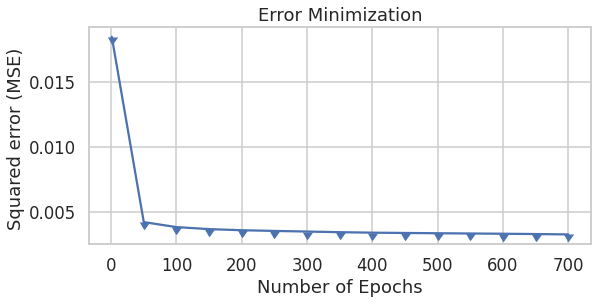

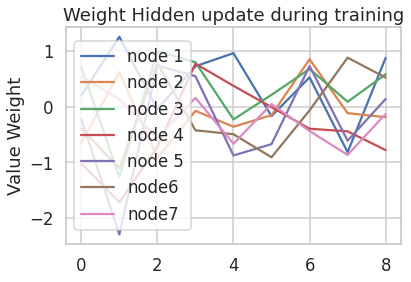

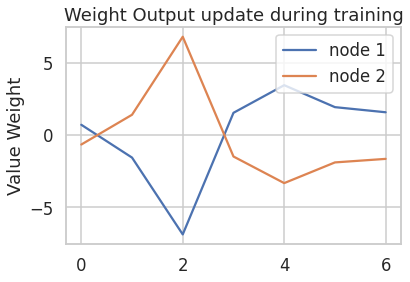

===================== Done=========================


In [243]:


mlp = MultiLayerPerceptron(dictionary)
mlp.fit(train_X,train_y.values.ravel())

print('===================== Done=========================')

In [244]:
prev, dataframe = mlp.predict(test_X, test_y.values.ravel())
hits =  n_benign = n_malignant = 0
score_benign = score_malignant = 0
test_y2 =np.array(test_y)
for j in range(len(test_y)):
    if(test_y2[j] == 0): n_benign += 1
    elif(test_y2[j] == 1): n_malignant += 1

        
for i in range(len(test_y)):
    if test_y2[i] == prev[i]: 
        hits += 1
    if test_y2[(i)] == prev[i] and test_y2[(i)] == 0:
        score_benign += 1
    elif test_y2[i] == prev[i] and test_y2[i] == 1:
        score_malignant += 1  
         
hits = (hits / len(test_y)) * 100
faults = 100 - hits

In [273]:
dataframe

,No,Breast cancer Tumor Classes,Taget Output,Expected output
0,0,Benign,0,0
1,1,Benign,0,0
2,2,Benign,0,0
3,3,Benign,0,0
4,4,Malignant,1,1
...,...,...,...,...
132,132,Malignant,1,1
133,133,Benign,0,0
134,134,Benign,0,0
135,135,Benign,0,0


Porcents : 98.54 % hits and 1.46 % faults
Total samples of test 683
*Malignant: 90 samples
*Benign: 47 samples


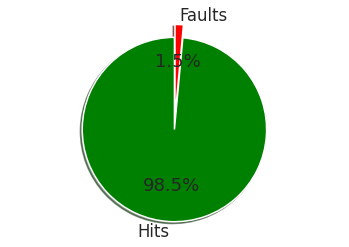

In [246]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
n_samples, n_features = cancer_data.shape
print("Total samples of test",n_samples)
print("*Malignant:",n_benign,"samples")
print("*Benign:",n_malignant,"samples")


graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

- Acurracy Malignant	: 97.87 %
- Acurracy Benign: 98.89 %


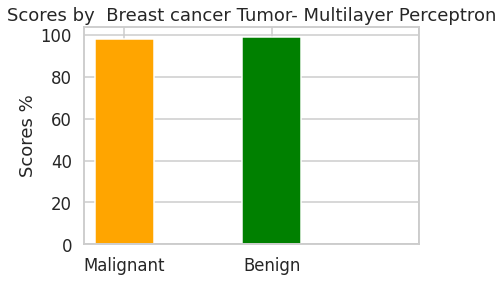

In [247]:
acc_benign = (score_benign/n_benign)*100
acc_malignant = (score_malignant/n_malignant)*100

print("- Acurracy Malignant	:","%.2f"%acc_malignant, "%")
print("- Acurracy Benign:","%.2f"%acc_benign, "%")

names = ["Malignant","Benign"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_malignant,color='orange',label='Malignant')
r2 = plt.bar(x1[1], acc_benign,color='green',label='Benign')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by  Breast cancer Tumor- Multilayer Perceptron')
plt.show()

In [249]:
model = Sequential()
model.add(Dense(10,input_shape=(9,)))
for i in range(2):# 2 hidden layers
    model.add(Dense(10,activation='tanh')) #10 neurons in each hidden layers
model.add(Dense(1, activation='sigmoid'))# output layer 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_X, train_y, epochs=10, batch_size=8)

Epoch 1/10
69/69 [==============================] - 1s 10ms/step - loss: 0.3949 - accuracy: 0.9011
Epoch 2/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1837 - accuracy: 0.9597
Epoch 3/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9652
Epoch 4/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9707
Epoch 5/10
69/69 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9707
Epoch 6/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9725
Epoch 7/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9725
Epoch 8/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9725
Epoch 9/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9744
Epoch 10/10
69/69 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9725


In [250]:
model.evaluate(test_X, test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9781


[0.06466108560562134, 0.9781022071838379]

In [251]:
y_pred = model.predict(test_X).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.01688239 0.01312622 0.01420018 0.01352108 0.93617946 0.94549215
 0.7845326  0.9600352  0.01825106 0.01292205]
[0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]


In [252]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        47

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137



In [258]:

#Multi Layer Perceptron

CLF = MLPClassifier()
CLF.fit(train_X, train_y.values.ravel())
y_pred_CLF = CLF.predict(test_X)
# Logistic Regression

logreg= LogisticRegression()

logreg.fit(train_X, train_y.values.ravel())

y_pred_logreg = logreg.predict(test_X)



# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(train_X, train_y.values.ravel())

y_pred_GB = GB.predict(test_X)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(train_X, train_y.values.ravel())

y_pred_rf = rf.predict(test_X)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(train_X, train_y.values.ravel())

y_pred_dt = dt.predict(test_X)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_X, train_y.values.ravel())

y_pred_knn = knn.predict(test_X)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(train_X, train_y.values.ravel())

y_pred_XGB = XGB.predict(test_X)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(train_X, train_y.values.ravel())

y_pred_svc = svc.predict(test_X)



In [259]:
train_X.shape, train_y.shape,test_X.shape, test_y.shape

((546, 9), (546, 1), (137, 9), (137, 1))

In [260]:
models = []

Z = [MLPClassifier(),SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["Multi-Layer perceptron","SVM" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit(train_X, train_y.values.ravel())
    pred = model.predict(test_X)
    models.append(accuracy_score(pred , test_y)) 

In [266]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)

data_frame

,Accuracy,Algorithm
0,0.985401,Multi-Layer perceptron
1,0.985401,SVM
2,0.934307,DecisionTreeClassifier
3,0.970803,LogisticRegression
4,0.978102,KNeighborsClassifier
5,0.948905,RandomForestClassifier
6,0.963504,GradientBoostingClassifier
7,0.963504,XGB


Text(0.5, 1.0, 'Accuracy of all Algorithms')

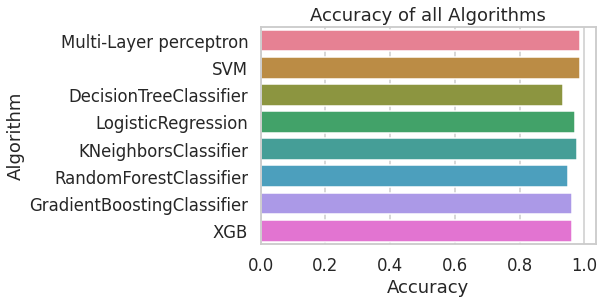

In [267]:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "husl").set_title('Accuracy of all Algorithms')